In [ ]:
from PIL import Image
from skimage import measure
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.spatial.distance import squareform

from pygexf.gexf import *

Image_folder = 'Y:\coskun-lab\Thomas\Mayar-Data\Image'
Mask_folder = 'Y:\coskun-lab\Thomas\Mayar-Data\Mask'
Cluster_folder = 'Y:\coskun-lab\Thomas\Mayar-Data\Clusters'

%matplotlib inline

In [ ]:
# Experiment
experiment = 'NT1 ROI005'

path = os.path.join(Cluster_folder, experiment, "distance.pkl")

f = open(path,"rb")
info = pickle.load(f)
f.close()

# Read cluster info
for (dirpath, dirnames, filenames) in os.walk(Cluster_folder):
    for name in filenames:
        if 'csv' in name and experiment in name:
            df = pd.read_csv(os.path.join(dirpath, name))

df.set_index('Marker', inplace=True)

# Read the info
marker2cluster = df.to_dict()['Cluster']
cluster2marker = info['label_map']
markers = info['markers']
marker2number = dict([(name,i) for i,name in enumerate(markers)])
number2marker = dict([(i,name) for i,name in enumerate(markers)])
inter_marker = info['inter_marker']
intra_marker = info['intra_marker']
inter_cluster = info['inter_cluster']
intra_cluster = info['intra_cluster']
inter_marker_nn = info['inter_marker_nn']
intra_marker_nn = info['intra_marker_nn']
inter_cluster_nn = info['inter_cluster_nn']
intra_cluster_nn = info['intra_cluster_nn']
count_per_cluster = info['count_per_cluster']
area_per_cluster = info['area_per_cluster']
count_per_marker = info['count_per_marker']
area_per_marker = info['area_per_marker']
rgb_map2 = info['rgb_map']
cell_overlap_marker = info['cell_overlap_marker']
cell_overlap_cluster = info['cell_overlap_cluster']

In [176]:
rgb_map = {}
for i in range(1,len(rgb_map2.keys())+1):
    rgb_map[i] = tuple(rgb_map2[i]['rgb']/255.0)
    

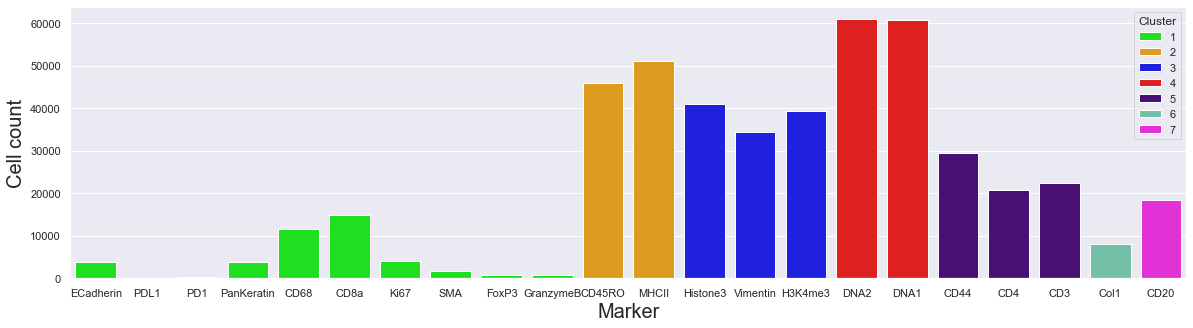

In [177]:
# Barplot of cell count per marker

sns.set(style="whitegrid")
sns.set(font_scale = 1)

plt.figure(figsize=(20,5))
df_count = pd.DataFrame({'Marker':markers, 'Cell count':list(count_per_marker.values()), 'Cluster': list(df.Cluster)})
df_count.sort_values(by = ['Cluster'], inplace=True) 
df_count['Cluster'] += 1
ax = sns.barplot(x="Marker", y="Cell count", hue='Cluster', data=df_count, dodge=False,palette=rgb_map)
ax.set_xlabel('Marker',fontsize=20);
ax.set_ylabel('Cell count',fontsize=20);

fig = ax.get_figure()
fig.savefig('count_marker.png', bbox_inches='tight')

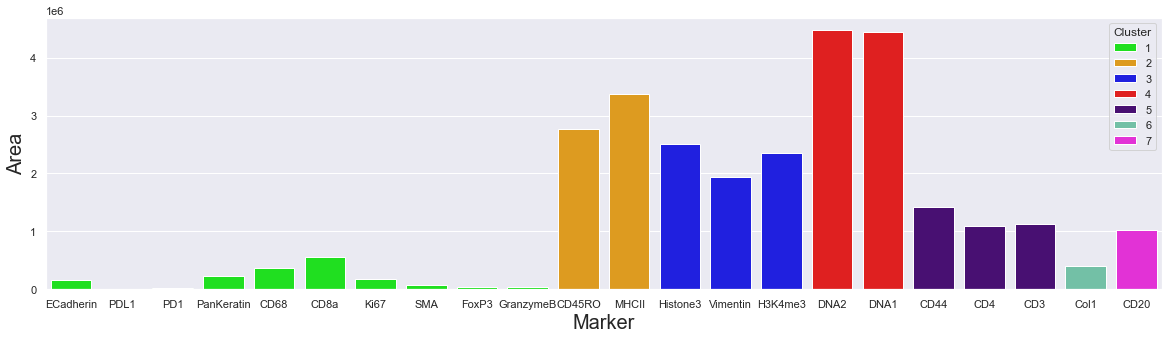

In [178]:
plt.figure(figsize=(20,5))
df_count = pd.DataFrame({'Marker':markers, 'Area':list(area_per_marker.values()), 'Cluster': list(df.Cluster)})
df_count.sort_values(by = ['Cluster'], inplace=True) 
df_count['Cluster'] += 1
df_count['Area']
ax = sns.barplot(x="Marker", y="Area", hue='Cluster', data=df_count, dodge=False,palette=rgb_map)
ax.set_xlabel('Marker',fontsize=20);
ax.set_ylabel('Area',fontsize=20);

fig = ax.get_figure()
fig.savefig('area_marker.png', bbox_inches='tight')

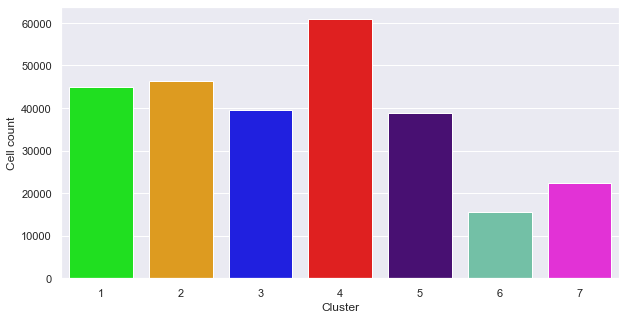

In [179]:
plt.figure(figsize=(10,5))
df_count = pd.DataFrame({'Cell count':list(count_per_cluster.values()), 'Cluster': list(count_per_cluster.keys())})
df_count.sort_values(by = ['Cluster'], inplace=True) 
df_count['Cluster'] += 1
ax = sns.barplot(x='Cluster', y="Cell count", data=df_count, dodge=False,palette=rgb_map)

fig = ax.get_figure()
fig.savefig('count_cluster.png', bbox_inches='tight')

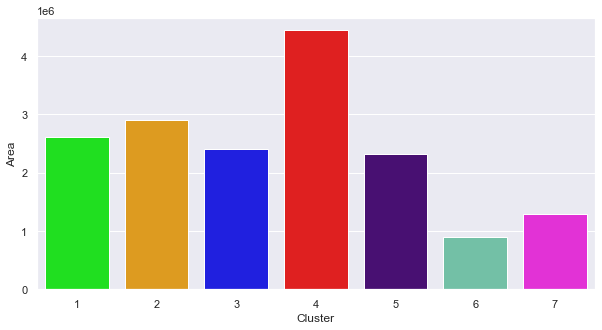

In [180]:
plt.figure(figsize=(10,5))
df_count = pd.DataFrame({'Area':list(area_per_cluster.values()), 'Cluster': list(count_per_cluster.keys())})
df_count.sort_values(by = ['Cluster'], inplace=True) 
df_count['Cluster'] += 1
ax = sns.barplot(x='Cluster', y="Area", data=df_count, dodge=False,palette=rgb_map)

fig = ax.get_figure()
fig.savefig('area_cluster.png', bbox_inches='tight')

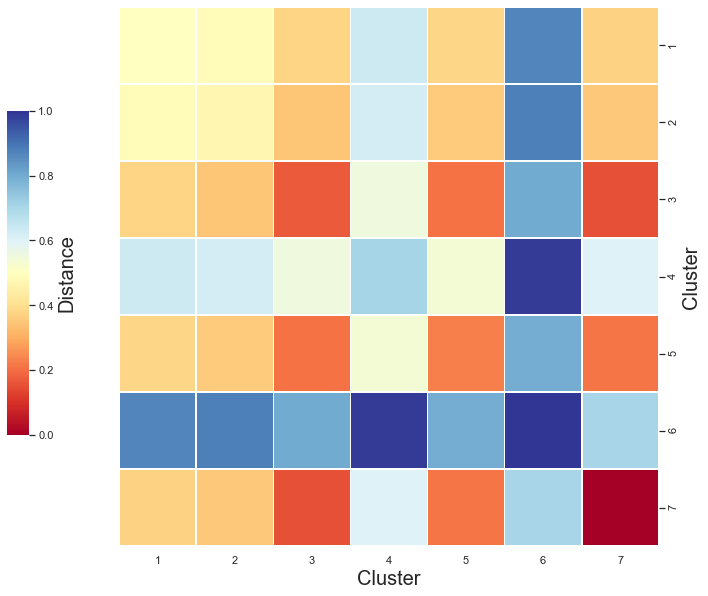

In [181]:
from scipy.spatial.distance import squareform

dist = []
cluster = np.array(list(intra_cluster.keys())) + 1

for i in inter_cluster.keys():
    for value in inter_cluster[i].values():
        dist.append(value)

x = squareform(dist)
for i in intra_cluster.keys():
    x[i][i] = intra_cluster[i]
    
xmax, xmin = x.max(), x.min()
x = (x - xmin)/(xmax - xmin)

df_dist = pd.DataFrame(x, index=cluster, columns=cluster)

# Plot clustermap
g = sns.clustermap(df_dist, row_cluster=False, col_cluster=False,cmap='RdYlBu',linewidths=.75, cbar_kws={'label': 'Distance'})
ax = g.ax_heatmap
ax.set_xlabel('Cluster', fontsize=20)
ax.set_ylabel('Cluster', fontsize=20)

g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

# Move color legend 
g.cax.set_position([.05, .2, .03, .45])
g.cax.yaxis.label.set_size(20)


# Save plot
g.savefig('cluster_hm.png')

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


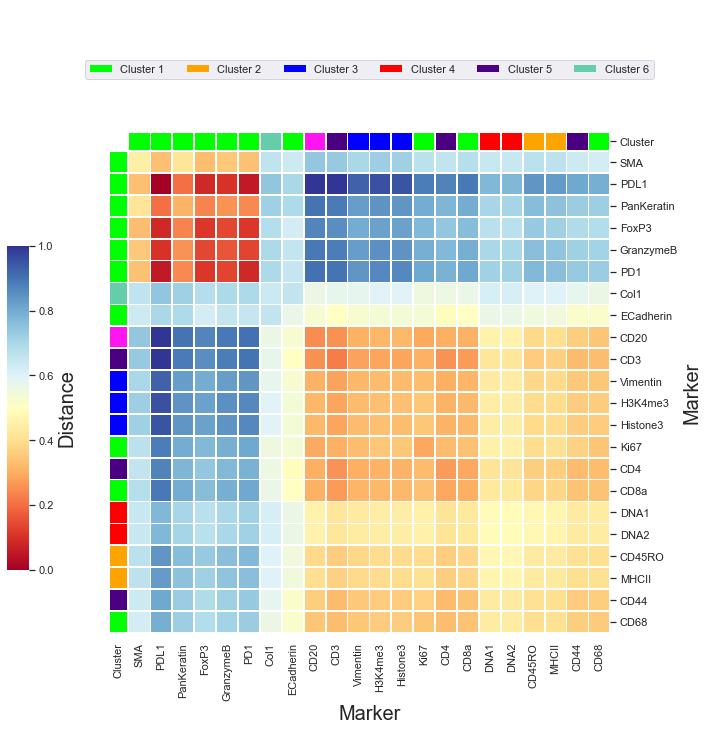

In [182]:
import matplotlib.colors as mcolors 

rgb_map = {}
for i in range(1,len(rgb_map2.keys())+1):
    rgb_map[i-1] = tuple(rgb_map2[i]['rgb']/255.0)
    

dist = []
cluster = np.array(list(intra_cluster.keys())) + 1

for i in inter_marker.keys():
    for value in inter_marker[i].values():
        dist.append(value)

x = squareform(dist)
for i in intra_marker.keys():
    x[i][i] = intra_marker[i]
    
xmax, xmin = x.max(), x.min()
x = (x - xmin)/(xmax - xmin)

df_dist = pd.DataFrame(x, index=markers, columns=markers)

cluster_colors = pd.Series(marker2cluster, index=markers, name='Cluster').map(rgb_map)

# Plot clustermap
g = sns.clustermap(df_dist, cmap='RdYlBu', linewidths=.75, row_colors=cluster_colors, col_colors=cluster_colors, cbar_kws={'label': 'Distance'})
ax = g.ax_heatmap
ax.set_xlabel('Marker', fontsize=20)
ax.set_ylabel('Marker', fontsize=20)

labels = ['Cluster ' + str(i)  for i in range(1,7)]

# Put cluster legend
for i,label in enumerate(labels):
    g.ax_col_dendrogram.bar(0, 0, color=rgb_map[i],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=6)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_xlim([0,0])

# Move color legend 
g.cax.set_position([.05, .2, .03, .45])
g.cax.yaxis.label.set_size(20)

# Save plot
g.savefig('marker_hm.png')

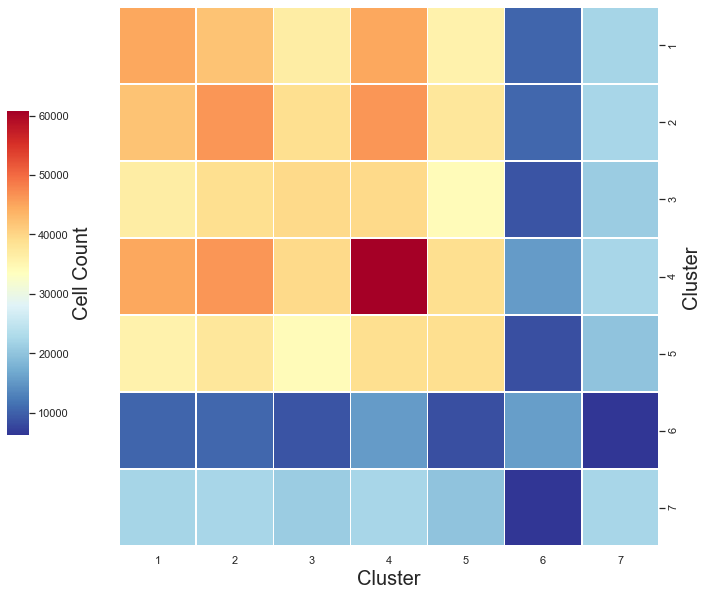

In [183]:
dist = []

n = len(cell_overlap_cluster.keys())
cluster = np.array(list(intra_cluster.keys())) + 1

for i in range(n-1):
    for j in range(i+1,n):
        dist.append(cell_overlap_cluster[i][j])

x = squareform(dist)
for i in range(n):
    x[i][i] = cell_overlap_cluster[i][i]
    
df_dist = pd.DataFrame(x, index=cluster, columns=cluster)

# Plot clustermap
g = sns.clustermap(df_dist, row_cluster=False, col_cluster=False,cmap='RdYlBu_r',linewidths=.75, cbar_kws={'label': 'Cell Count'})
ax = g.ax_heatmap
ax.set_xlabel('Cluster', fontsize=20)
ax.set_ylabel('Cluster', fontsize=20)

g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

# Move color legend 
g.cax.set_position([.05, .2, .03, .45])
g.cax.yaxis.label.set_size(20)


# Save plot
g.savefig('cluster_overlap.png')

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


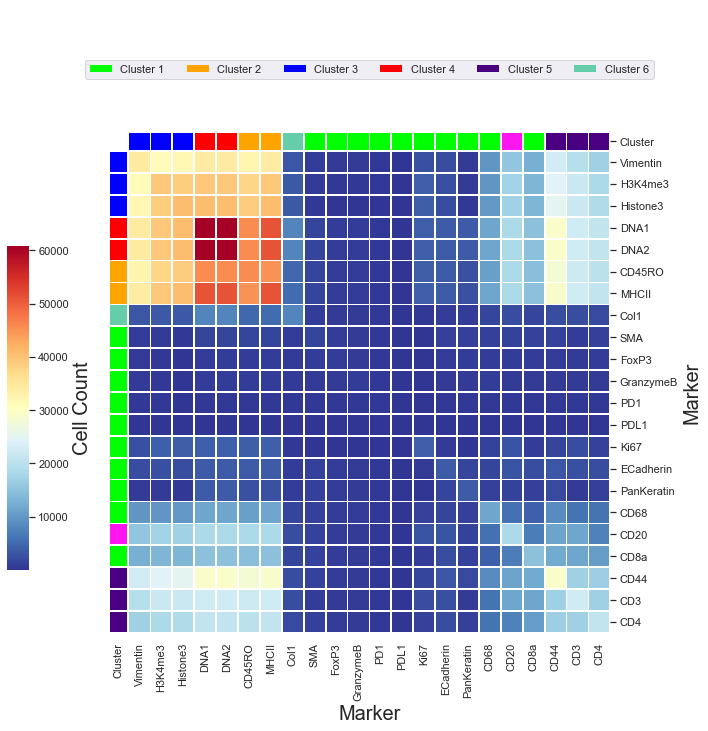

In [184]:
dist = []
n = len(cell_overlap_marker.keys())
cluster = np.array(list(intra_cluster.keys())) + 1

for i in range(n-1):
    for j in range(i+1,n):
        dist.append(cell_overlap_marker[i][j])
        
x = squareform(dist)
for i in range(n):
    x[i][i] = cell_overlap_marker[i][i]
    
df_dist = pd.DataFrame(x, index=markers, columns=markers)

cluster_colors = pd.Series(marker2cluster, index=markers, name='Cluster').map(rgb_map)

# Plot clustermap
g = sns.clustermap(df_dist, cmap='RdYlBu_r', linewidths=.75, row_colors=cluster_colors, col_colors=cluster_colors, cbar_kws={'label': 'Cell Count'})
ax = g.ax_heatmap
ax.set_xlabel('Marker', fontsize=20)
ax.set_ylabel('Marker', fontsize=20)

labels = ['Cluster ' + str(i)  for i in range(1,7)]

# Put cluster legend
for i,label in enumerate(labels):
    g.ax_col_dendrogram.bar(0, 0, color=rgb_map[i],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=6)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_xlim([0,0])

# Move color legend 
g.cax.set_position([.05, .2, .03, .45])
g.cax.yaxis.label.set_size(20)


# Save plot
g.savefig('marker_overlap.png')

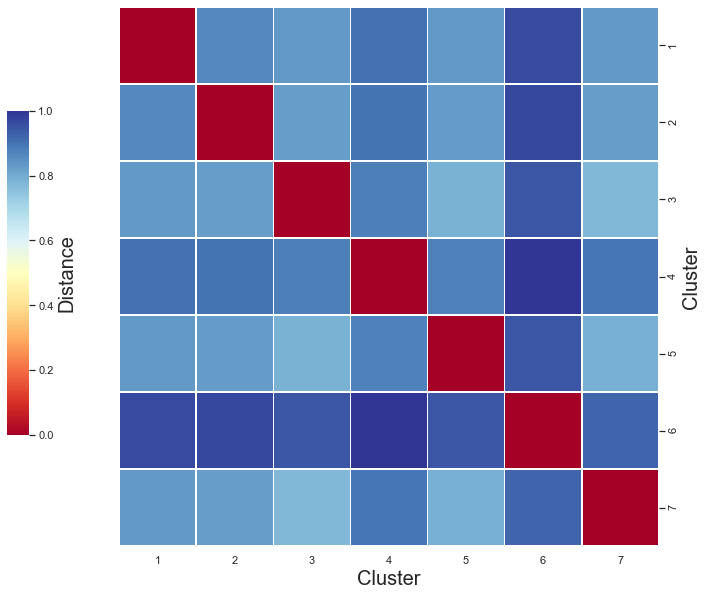

In [185]:
from scipy.spatial.distance import squareform

dist = []
cluster = np.array(list(intra_cluster_nn.keys())) + 1

for i in inter_cluster_nn.keys():
    for value in inter_cluster[i].values():
        dist.append(value)

x = squareform(dist)
for i in intra_cluster_nn.keys():
    x[i][i] = intra_cluster_nn[i]
    
xmax, xmin = x.max(), x.min()
x = (x - xmin)/(xmax - xmin)

df_dist = pd.DataFrame(x, index=cluster, columns=cluster)

# Plot clustermap
g = sns.clustermap(df_dist, row_cluster=False, col_cluster=False,cmap='RdYlBu',linewidths=.75, cbar_kws={'label': 'Distance'})
ax = g.ax_heatmap
ax.set_xlabel('Cluster', fontsize=20)
ax.set_ylabel('Cluster', fontsize=20)

g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

# Move color legend 
g.cax.set_position([.05, .2, .03, .45])
g.cax.yaxis.label.set_size(20)


# Save plot
g.savefig('cluster_nn.png')

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


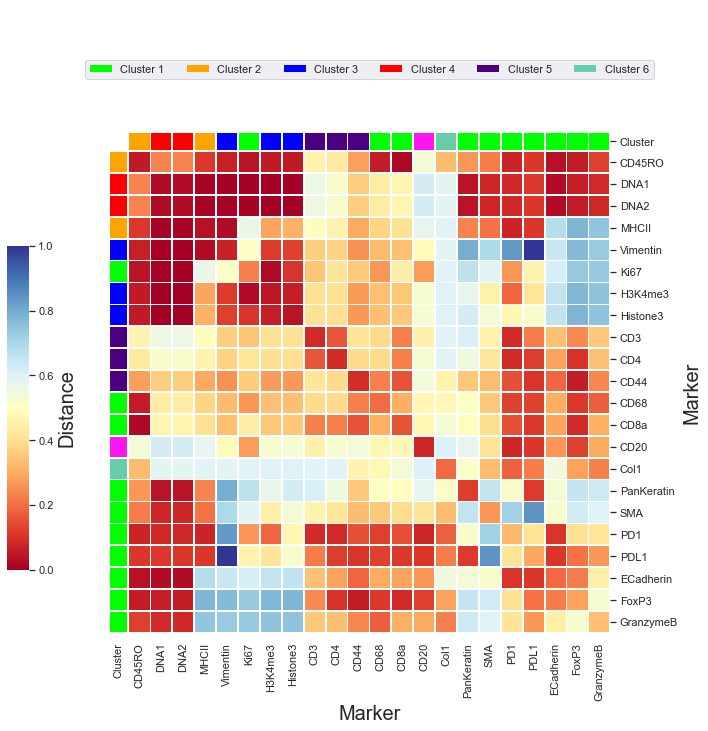

In [186]:
import matplotlib.colors as mcolors 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy.spatial as sp, scipy.cluster.hierarchy as hc


dist = []
cluster = np.array(list(intra_cluster_nn.keys())) + 1

for i in inter_marker_nn.keys():
    for value in inter_marker_nn[i].values():
        dist.append(value)

x = squareform(dist)
for i in intra_marker_nn.keys():
    x[i][i] = intra_marker_nn[i]
    
x = np.log(x)

xmax, xmin = x.max(), x.min()
x = (x - xmin)/(xmax - xmin)

df_dist = pd.DataFrame(x, index=markers, columns=markers)

cluster_colors = pd.Series(marker2cluster, index=markers, name='Cluster').map(rgb_map)

# Plot clustermap
g = sns.clustermap(df_dist, cmap='RdYlBu', linewidths=.75, row_colors=cluster_colors, col_colors=cluster_colors, cbar_kws={'label': 'Distance'})
ax = g.ax_heatmap
ax.set_xlabel('Marker', fontsize=20)
ax.set_ylabel('Marker', fontsize=20)

labels = ['Cluster ' + str(i)  for i in range(1,7)]

# Put cluster legend
for i,label in enumerate(labels):
    g.ax_col_dendrogram.bar(0, 0, color=rgb_map[i],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=6)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_xlim([0,0])

# Move color legend 
g.cax.set_position([.05, .2, .03, .45])
g.cax.yaxis.label.set_size(20)


# Save plot
g.savefig('marker_nn.png')